In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()
useducation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [2]:
# First interpolate the data

fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = useducation_df["STATE"].unique()

for state in states:
    useducation_df.loc[useducation_df["STATE"] == state, fill_list] = useducation_df.loc[useducation_df["STATE"] == state, fill_list].interpolate()

# Then drop the remaining null values
#useducation_df.dropna(inplace=True)



useducation_df["winsorized_revenue"] = winsorized_revenue = winsorize(useducation_df["TOTAL_REVENUE"], (0, 0.05))
useducation_df["winsorized_expenditure"] = winsorized_expenditure = winsorize(useducation_df["TOTAL_EXPENDITURE"], (0, 0.05))
useducation_df["budget_deficit"] = budget_deficit = useducation_df["TOTAL_REVENUE"] - useducation_df["TOTAL_EXPENDITURE"]
useducation_df["winsorized_deficit"] = winsorized_deficit = winsorize(budget_deficit, (0.05, 0.05))

        

### 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [3]:
useducation_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,winsorized_revenue,winsorized_expenditure,budget_deficit,winsorized_deficit
count,1492.000000,1.281000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.281000e+03,...,1.485000e+03,1.443000e+03,536.000000,532.000000,533.000000,498.000000,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03
mean,2004.433646,9.166431e+05,9.246804e+06,7.772786e+05,4.289618e+06,4.179907e+06,9.342417e+06,4.844756e+06,2.725092e+06,4.348513e+05,...,2.463631e+05,8.016962e+05,234.768293,278.414711,218.866154,263.661132,9.246804e+06,9.342417e+06,-9.561334e+04,-4.206522e+04
std,7.393983,1.067856e+06,1.200350e+07,1.155857e+06,5.674137e+06,5.608607e+06,1.220752e+07,6.433283e+06,3.420267e+06,5.426507e+05,...,3.092694e+05,9.820252e+05,10.221511,10.159722,7.769616,6.803725,1.200350e+07,1.220752e+07,5.794221e+05,3.875412e+05
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102,4.656500e+05,4.816650e+05,-5.487742e+06,-8.071900e+05
25%,1998.000000,2.583140e+05,2.200842e+06,1.910190e+05,1.172219e+06,7.254095e+05,2.176975e+06,1.177296e+06,6.447875e+05,1.043740e+05,...,5.008300e+04,1.727145e+05,229.694352,272.761598,214.663401,259.533171,2.200842e+06,2.176975e+06,-1.808230e+05,-1.808230e+05
50%,2004.000000,6.515540e+05,5.169926e+06,4.100510e+05,2.578149e+06,2.089445e+06,5.298267e+06,2.688963e+06,1.545738e+06,2.741430e+05,...,1.622720e+05,5.449220e+05,237.238552,280.618803,220.416034,265.010912,5.169926e+06,5.298267e+06,-1.891500e+04,-1.891500e+04
75%,2011.000000,1.014528e+06,1.109900e+07,8.440360e+05,5.185174e+06,4.808003e+06,1.087317e+07,5.641158e+06,3.307162e+06,5.261780e+05,...,2.913940e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121,1.109900e+07,1.087317e+07,5.795900e+04,5.795900e+04
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130,8.921726e+07,8.532013e+07,3.897129e+06,3.897129e+06


1. The average for budget_deficit is negative, so most or all years there must have been a budget deficit.
2. Instruction expenditure makes up almost half of the total expenditures on education.
3. Average math scores are higher than average reading scores AND the stdev of the average math scores is also higher than the stdev of the average reading scores.
4. The average total expenditure comes out to be about $11.50 per student (this seems impossibly low???)

### 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

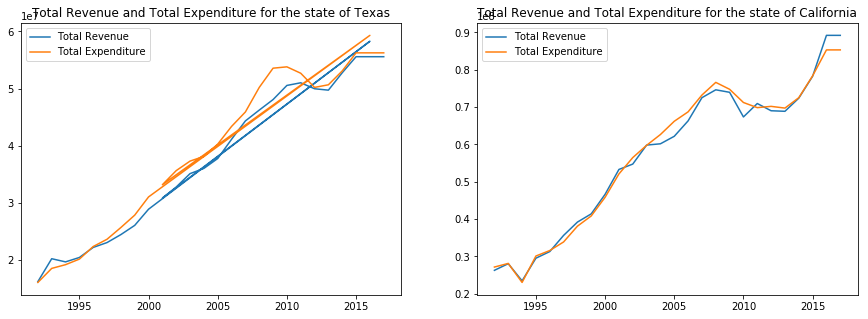

In [4]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.plot(useducation_df.loc[useducation_df.STATE == "TEXAS", "YEAR"],
         useducation_df.loc[useducation_df.STATE == "TEXAS", "TOTAL_REVENUE"], label="Total Revenue")

plt.plot(useducation_df.loc[useducation_df.STATE == "TEXAS", "YEAR"],
         useducation_df.loc[useducation_df.STATE == "TEXAS", "TOTAL_EXPENDITURE"], label="Total Expenditure")

plt.title("Total Revenue and Total Expenditure for the state of Texas")
plt.legend()

plt.subplot(1,2,2)
plt.plot(useducation_df.loc[useducation_df.STATE == "CALIFORNIA", "YEAR"],
         useducation_df.loc[useducation_df.STATE == "CALIFORNIA", "TOTAL_REVENUE"], label="Total Revenue")

plt.plot(useducation_df.loc[useducation_df.STATE == "CALIFORNIA", "YEAR"],
         useducation_df.loc[useducation_df.STATE == "CALIFORNIA", "TOTAL_EXPENDITURE"], label="Total Expenditure")

plt.title("Total Revenue and Total Expenditure for the state of California")

plt.legend()
plt.show()

### 3. In your chosen state, which of the lessons are the students more successful, math or reading?

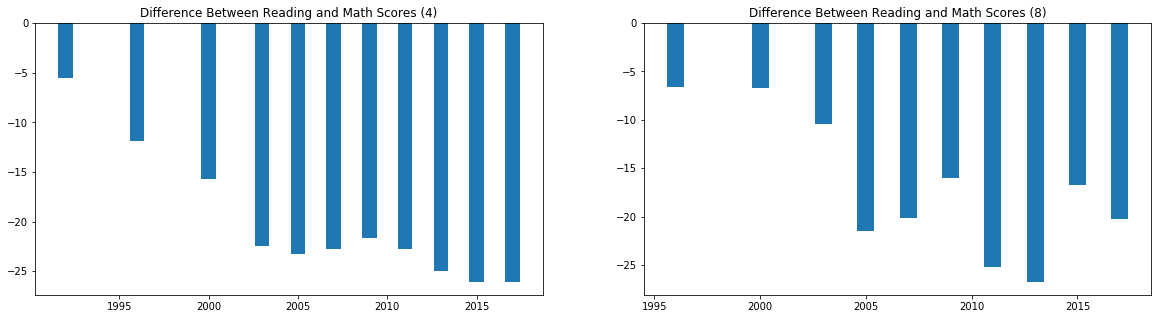

Difference Between Reading and Math Scores (4)
44      -5.524433
96            NaN
148           NaN
201           NaN
252    -11.850907
304           NaN
355           NaN
407           NaN
460    -15.733788
481           NaN
512           NaN
564           NaN
616    -22.497916
668           NaN
719    -23.257092
771           NaN
824    -22.735447
876           NaN
932    -21.606351
984           NaN
1036   -22.780949
1088          NaN
1140   -25.016692
1191          NaN
1242   -26.059559
1484   -26.065177
dtype: float64
Difference Between Reading and Math Scores (8)
44            NaN
96            NaN
148           NaN
201           NaN
252     -6.607836
304           NaN
355           NaN
407           NaN
460     -6.755989
481           NaN
512           NaN
564           NaN
616    -10.486543
668           NaN
719    -21.471485
771           NaN
824    -20.160498
876           NaN
932    -15.984540
984           NaN
1036   -25.227153
1088          NaN
1140   -26.749917
1191     

In [5]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.bar(useducation_df.loc[useducation_df.STATE == "TEXAS", "YEAR"],
         useducation_df.loc[useducation_df.STATE == "TEXAS", "AVG_READING_4_SCORE"]
        - useducation_df.loc[useducation_df.STATE == "TEXAS", "AVG_MATH_4_SCORE"])

plt.title("Difference Between Reading and Math Scores (4)")

plt.subplot(1,2,2)
plt.bar(useducation_df.loc[useducation_df.STATE == "TEXAS", "YEAR"],
         useducation_df.loc[useducation_df.STATE == "TEXAS", "AVG_READING_8_SCORE"]
        - useducation_df.loc[useducation_df.STATE == "TEXAS", "AVG_MATH_8_SCORE"])

plt.title("Difference Between Reading and Math Scores (8)")

plt.show()

print("Difference Between Reading and Math Scores (4)")
print(useducation_df.loc[useducation_df.STATE == "TEXAS", "AVG_READING_4_SCORE"]
      - useducation_df.loc[useducation_df.STATE == "TEXAS", "AVG_MATH_4_SCORE"])

print("Difference Between Reading and Math Scores (8)")
print(useducation_df.loc[useducation_df.STATE == "TEXAS", "AVG_READING_8_SCORE"]
      - useducation_df.loc[useducation_df.STATE == "TEXAS", "AVG_MATH_8_SCORE"])

In Texas the students are more successful at math than reading since the differences  (Reading score - Math score) are negative.

### 4. What are the distributions of the math and reading scores in the sample?

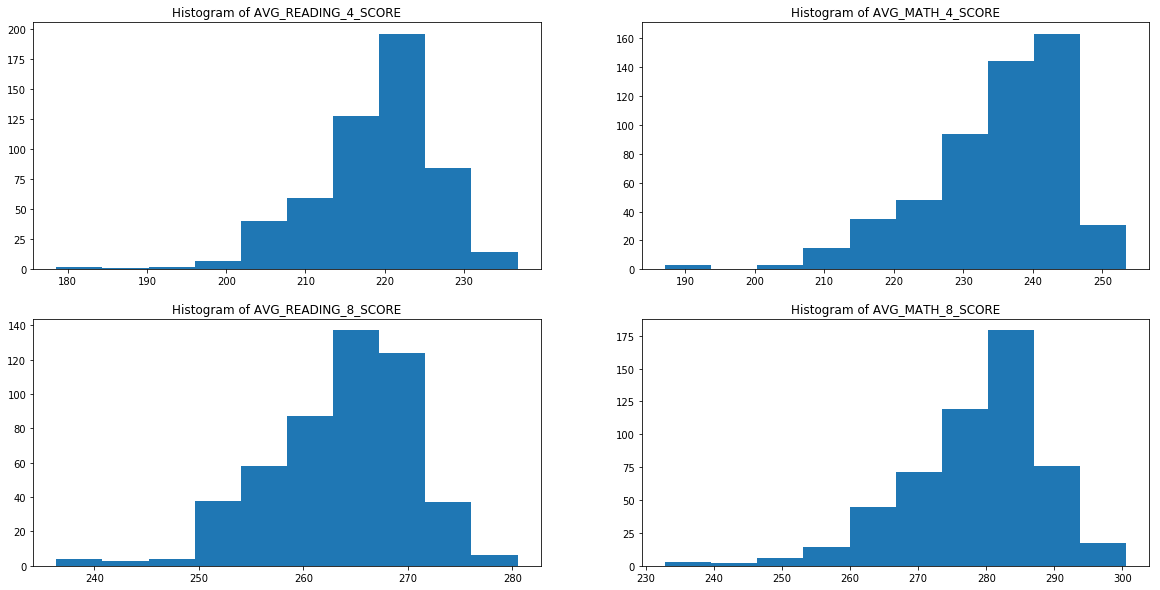

In [6]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(useducation_df.AVG_READING_4_SCORE.dropna())
plt.title("Histogram of {}".format("AVG_READING_4_SCORE"))

plt.subplot(2,2,2)
plt.hist(useducation_df.AVG_MATH_4_SCORE.dropna())
plt.title("Histogram of {}".format("AVG_MATH_4_SCORE"))

plt.subplot(2,2,3)
plt.hist(useducation_df.AVG_READING_8_SCORE.dropna())
plt.title("Histogram of {}".format("AVG_READING_8_SCORE"))

plt.subplot(2,2,4)
plt.hist(useducation_df.AVG_MATH_8_SCORE.dropna())
plt.title("Histogram of {}".format("AVG_MATH_8_SCORE"))
plt.show()

For both reading and writing the data is not normally distributed, instead it is slightly skewed to the right indicating that the averge of all scores is below the median. 

### 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

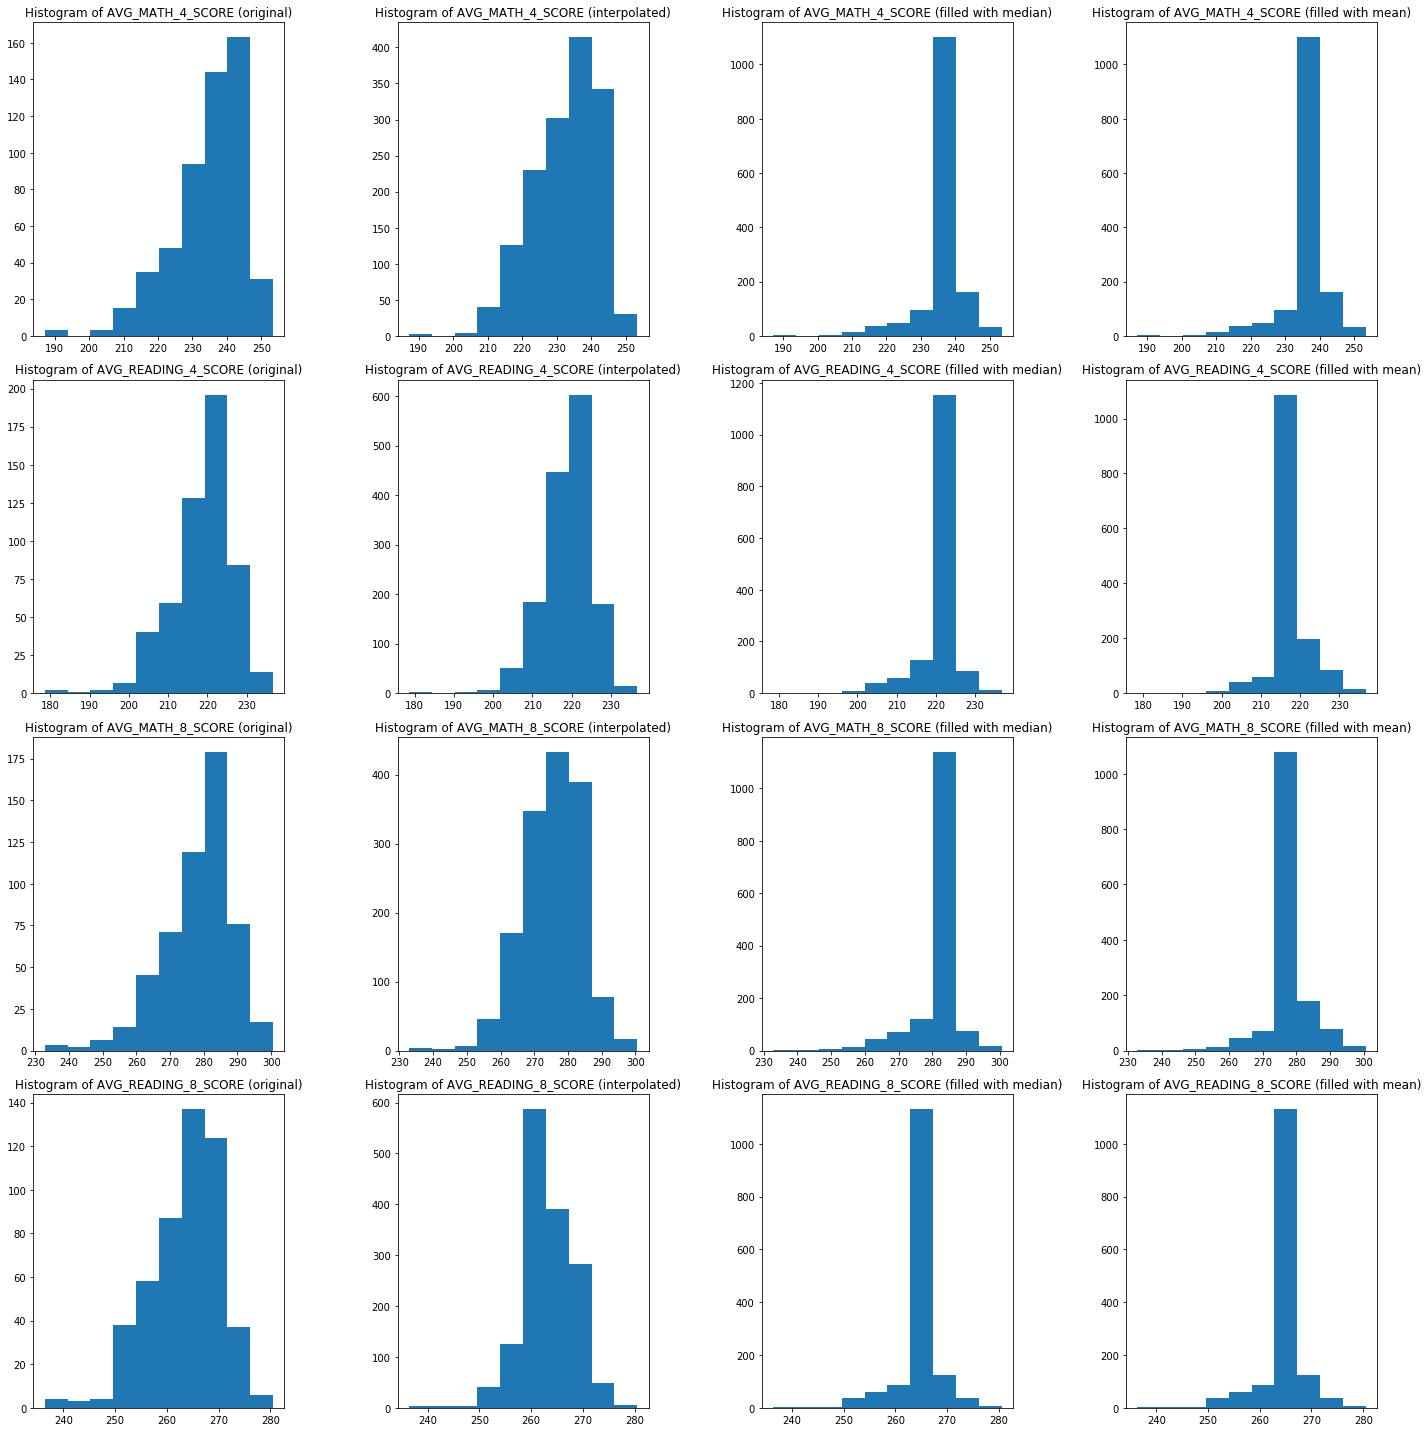

In [7]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(useducation_df.AVG_MATH_4_SCORE.dropna())
plt.title("Histogram of {} (original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(useducation_df.AVG_MATH_4_SCORE.interpolate())
plt.title("Histogram of {} (interpolated)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(useducation_df.AVG_MATH_4_SCORE.fillna(useducation_df.AVG_MATH_4_SCORE.median()))
plt.title("Histogram of {} (filled with median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(useducation_df.AVG_MATH_4_SCORE.fillna(useducation_df.AVG_MATH_4_SCORE.mean()))
plt.title("Histogram of {} (filled with mean)".format("AVG_MATH_4_SCORE"))

#################################################################################################

plt.subplot(4,4,5)
plt.hist(useducation_df.AVG_READING_4_SCORE.dropna())
plt.title("Histogram of {} (original)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(useducation_df.AVG_READING_4_SCORE.interpolate())
plt.title("Histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,7)
plt.hist(useducation_df.AVG_READING_4_SCORE.fillna(useducation_df.AVG_READING_4_SCORE.median()))
plt.title("Histogram of {} (filled with median)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(useducation_df.AVG_READING_4_SCORE.fillna(useducation_df.AVG_READING_4_SCORE.mean()))
plt.title("Histogram of {} (filled with mean)".format("AVG_READING_4_SCORE"))

#################################################################################################

plt.subplot(4,4,9)
plt.hist(useducation_df.AVG_MATH_8_SCORE.dropna())
plt.title("Histogram of {} (original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(useducation_df.AVG_MATH_8_SCORE.interpolate())
plt.title("Histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(useducation_df.AVG_MATH_8_SCORE.fillna(useducation_df.AVG_MATH_8_SCORE.median()))
plt.title("Histogram of {} (filled with median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(useducation_df.AVG_MATH_8_SCORE.fillna(useducation_df.AVG_MATH_8_SCORE.mean()))
plt.title("Histogram of {} (filled with mean)".format("AVG_MATH_8_SCORE"))

#################################################################################################

plt.subplot(4,4,13)
plt.hist(useducation_df.AVG_READING_8_SCORE.dropna())
plt.title("Histogram of {} (original)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(useducation_df.AVG_READING_8_SCORE.interpolate().dropna())
plt.title("Histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(useducation_df.AVG_READING_8_SCORE.fillna(useducation_df.AVG_READING_8_SCORE.median()))
plt.title("Histogram of {} (filled with median)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(useducation_df.AVG_READING_8_SCORE.fillna(useducation_df.AVG_READING_8_SCORE.mean()))
plt.title("Histogram of {} (filled with mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout()
plt.show()